Implement two layer feed forward neural network for XOR logic gate

In [1]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [2]:
loss_list = []
torch.manual_seed(42)

In [3]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype = torch.float32)
Y = torch.tensor([0,1,1,0], dtype = torch.float32)

In [4]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.w = torch.nn.Parameter(torch.rand([1]))
        self.b = torch.nn.Parameter(torch.rand([1]))
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
        self.activation2 = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x


In [5]:
class MyDataset(Dataset):
    def __init__(self, X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [6]:
full_dataset = MyDataset(X,Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = XORModel().to(device)
print(model)

cuda
XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): ReLU()
)


In [7]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.03)

In [8]:
def train_one_epoch(epoch_index):
    totalloss = 0
    for i,data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader) * batch_size)

In [9]:
epochs = 10000
for epoch in range(epochs):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f'Epoch {epoch}/{epochs}, loss: {avg_loss}')

Epoch 0/10000, loss: 0.28455115109682083
Epoch 1000/10000, loss: 0.25913458690047264
Epoch 2000/10000, loss: 0.0001244628529093461
Epoch 3000/10000, loss: 9.543477119677846e-12
Epoch 4000/10000, loss: 1.595168441781425e-12
Epoch 5000/10000, loss: 1.595168441781425e-12
Epoch 6000/10000, loss: 1.595168441781425e-12
Epoch 7000/10000, loss: 1.595168441781425e-12
Epoch 8000/10000, loss: 1.63069557856943e-12
Epoch 9000/10000, loss: 1.63069557856943e-12


In [10]:
for param in model.named_parameters():
    print(param)

('w', Parameter containing:
tensor([0.8823], device='cuda:0', requires_grad=True))
('b', Parameter containing:
tensor([0.9150], device='cuda:0', requires_grad=True))
('linear1.weight', Parameter containing:
tensor([[-2.6233,  2.5992],
        [-2.3309,  2.3133]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-1.8279,  1.2729], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[ 2.7392, -2.5743]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([1.6318], device='cuda:0', requires_grad=True))


In [11]:
input = torch.tensor([0,1], dtype = torch.float32).to(device)
model.eval()
print('The input is {}'.format(input))
print('output y predicted ={}'.format(model(input)))

The input is tensor([0., 1.], device='cuda:0')
output y predicted =tensor([1.0000], device='cuda:0', grad_fn=<ReluBackward0>)


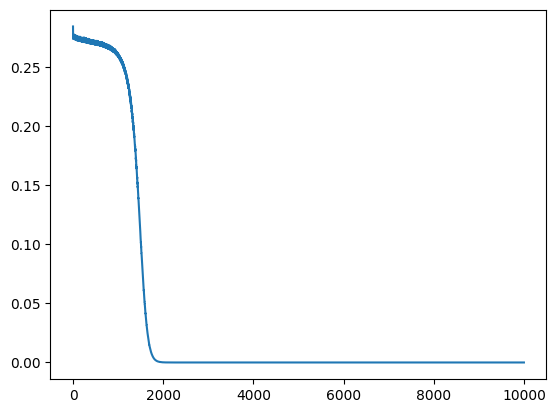

In [12]:
plt.plot(loss_list)
plt.show()